In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC


In [6]:

# Load the dataset
data = pd.read_csv(r'C:\Users\Public\Yomi\Python\Bravplus Project\winequality-red.csv')

In [10]:

# Check for null values
print(data.isna().sum())

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
dtype: int64


In [7]:
# Check for inconsistent values
print(data.describe(include='all'))


       fixed acidity  volatile acidity  citric acid  residual sugar  \
count    1599.000000       1599.000000  1599.000000     1599.000000   
mean        8.319637          0.527821     0.270976        2.538806   
std         1.741096          0.179060     0.194801        1.409928   
min         4.600000          0.120000     0.000000        0.900000   
25%         7.100000          0.390000     0.090000        1.900000   
50%         7.900000          0.520000     0.260000        2.200000   
75%         9.200000          0.640000     0.420000        2.600000   
max        15.900000          1.580000     1.000000       15.500000   

         chlorides  free sulfur dioxide  total sulfur dioxide      density  \
count  1599.000000          1599.000000           1599.000000  1599.000000   
mean      0.087467            15.874922             46.467792     0.996747   
std       0.047065            10.460157             32.895324     0.001887   
min       0.012000             1.000000         

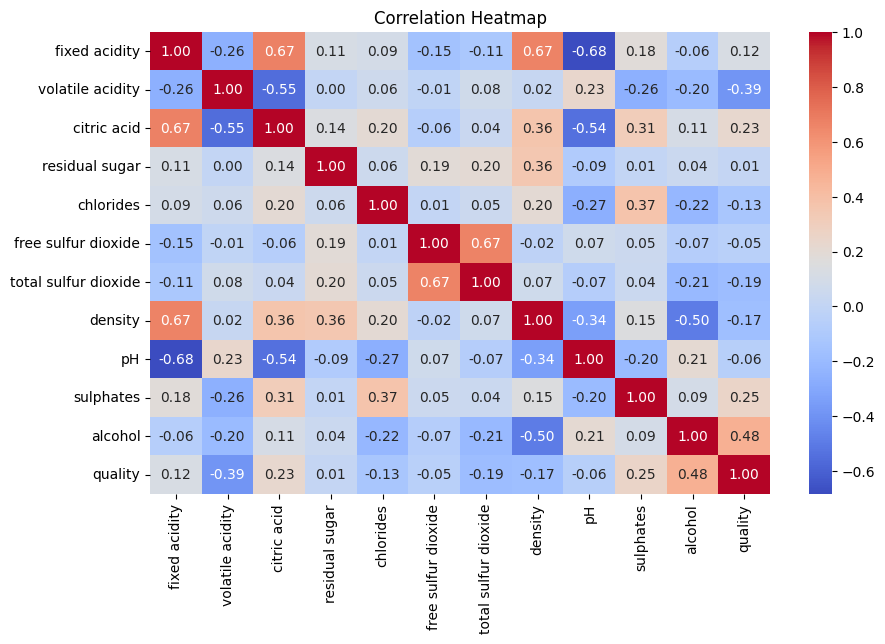

In [8]:
# Task 4: Exploratory Data Analysis (EDA)
# Heatmap for correlation
correlation_matrix = data.corr()
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

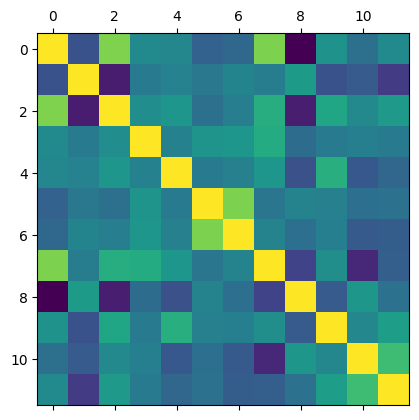

In [9]:
# Exploratory data analysis
correlation_matrix = data.corr()
plt.matshow(correlation_matrix)
plt.show()


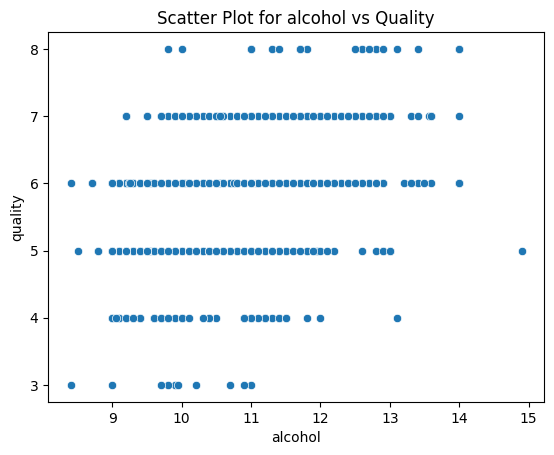

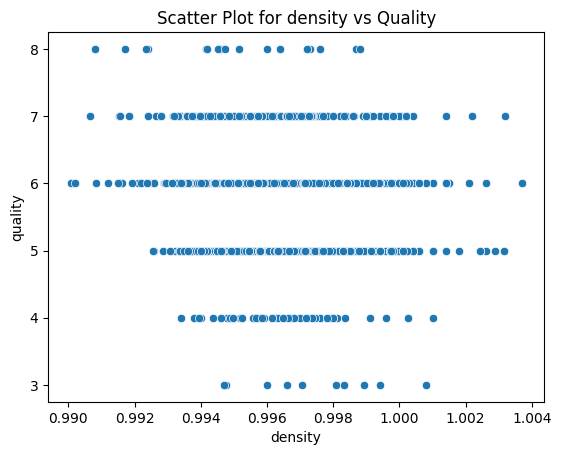

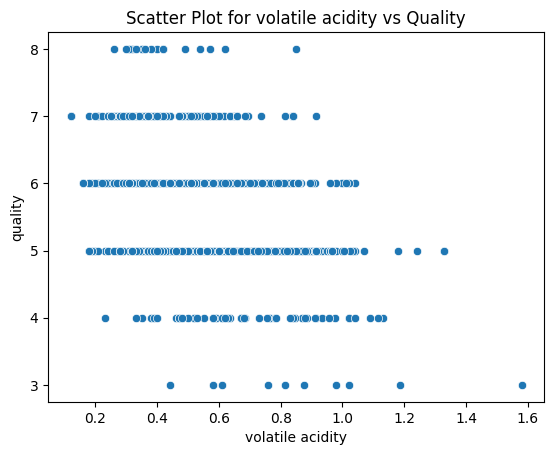

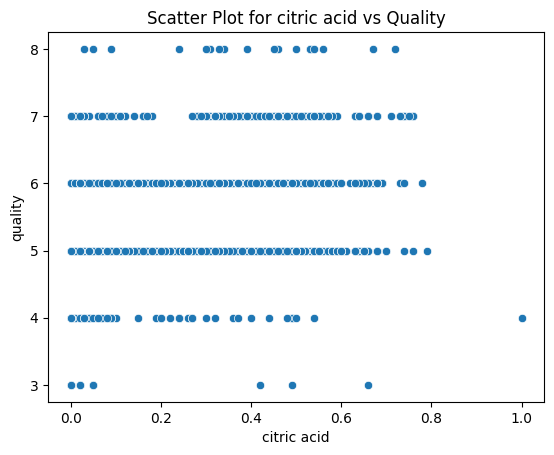

In [10]:
# Scatter plots for variables with strong correlation
strong_correlation_vars = ['alcohol', 'density', 'volatile acidity', 'citric acid']
for var in strong_correlation_vars:
    sns.scatterplot(x=var, y='quality', data=data)
    plt.title(f'Scatter Plot for {var} vs Quality')
    plt.show()

In [11]:

for i, row in data.iterrows():
    if abs(row['alcohol'] - data['alcohol'].mean()) > 3 * data['alcohol'].std():
        print(i)


142
144
467
588
652
821
1269
1270


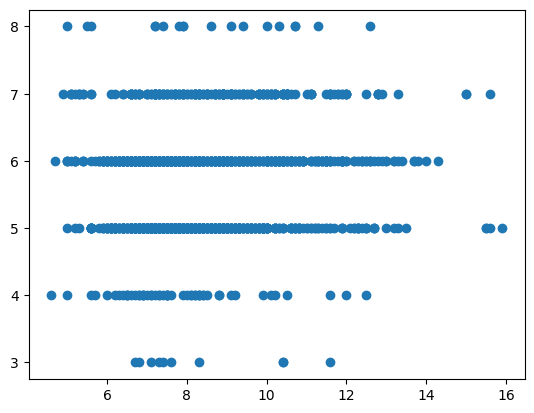

In [12]:
plt.scatter(data['fixed acidity'], data['quality'])
plt.show()


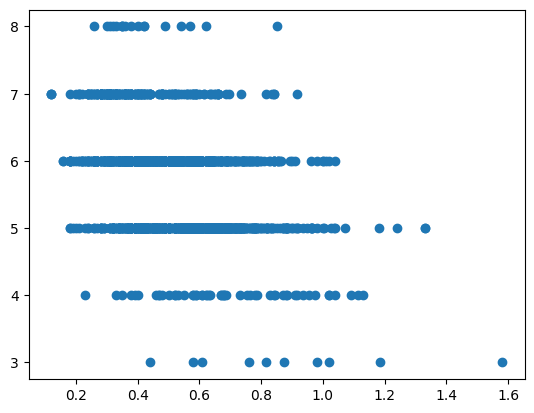

In [13]:
plt.scatter(data['volatile acidity'], data['quality'])
plt.show()


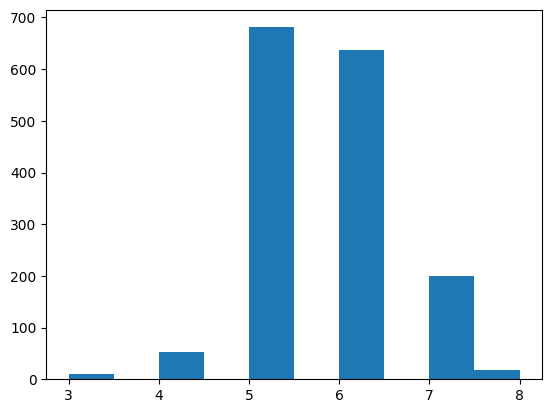

In [14]:

plt.hist(data['quality'])
plt.show()

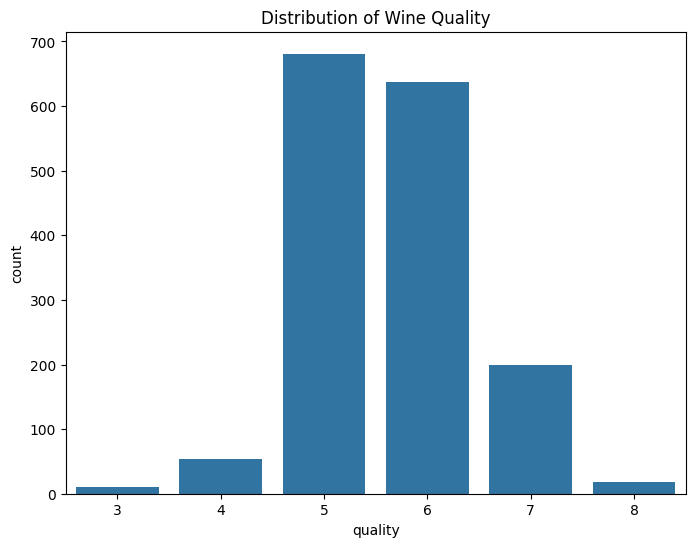

In [54]:
# Bar chart for the distribution of the target variable
plt.figure(figsize=(8, 6))
sns.countplot(x='quality', data=data)
plt.title('Distribution of Wine Quality')
plt.show()

In [15]:
# Task 5: Train machine learning models
# Split the data into features and target variable
X = data.drop('quality', axis=1)
y = data['quality']

# Split the data into training and testing sets (80:20 ratio)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)



In [62]:
# Train models
models = [DecisionTreeClassifier(), RandomForestClassifier(), SVC()]
for model in models:
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    
    # Display results
    print(f"\nResults for {model.__class__.__name__}:")
    print("Accuracy Score:", accuracy_score(y_test, y_pred))
    print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))
    print("Classification Report:\n", classification_report(y_test, y_pred))


Results for DecisionTreeClassifier:
Accuracy Score: 0.55625
Confusion Matrix:
 [[ 0  0  0  1  0  0]
 [ 0  1  5  4  0  0]
 [ 1  6 84 37  2  0]
 [ 0  2 43 69 17  1]
 [ 0  0  4 12 24  2]
 [ 0  0  1  3  1  0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.11      0.10      0.11        10
           5       0.61      0.65      0.63       130
           6       0.55      0.52      0.53       132
           7       0.55      0.57      0.56        42
           8       0.00      0.00      0.00         5

    accuracy                           0.56       320
   macro avg       0.30      0.31      0.30       320
weighted avg       0.55      0.56      0.55       320


Results for RandomForestClassifier:
Accuracy Score: 0.653125
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 96 33  1  0]
 [ 0  0 31 92  8  1]
 [ 0  0  0 20 21  1]
 [ 0  0  0  1  4  0]]
Classification Rep

C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [20]:

'''
# Train linear regression model
model1 = LinearRegression()
model1.fit(X_train, y_train)
y_pred = model1.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, y_pred)) 

'''


"\n# Train linear regression model\nmodel1 = LinearRegression()\nmodel1.fit(X_train, y_train)\ny_pred = model1.predict(X_test)\nprint('Accuracy score:', accuracy_score(y_test, y_pred)) \n\n"

In [22]:
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.5035304415524375
Mean Squared Error: 0.39002514396395427
R-squared: 0.4031803412796229


In [23]:
# Train k-neighbors classifier model
model2 = KNeighborsClassifier()
model2.fit(X_train, y_train)
y_pred = model2.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification report:')
print(classification_report(y_test, y_pred))

Accuracy score: 0.45625
Confusion matrix:
[[ 0  0  1  0  0  0]
 [ 0  0  5  5  0  0]
 [ 0  0 82 44  4  0]
 [ 0  2 65 59  6  0]
 [ 0  0 14 22  5  1]
 [ 0  0  1  3  1  0]]
Classification report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.49      0.63      0.55       130
           6       0.44      0.45      0.45       132
           7       0.31      0.12      0.17        42
           8       0.00      0.00      0.00         5

    accuracy                           0.46       320
   macro avg       0.21      0.20      0.19       320
weighted avg       0.42      0.46      0.43       320



C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [24]:
# Train random forest classifier model
model3 = RandomForestClassifier()
model3.fit(X_train, y_train)
y_pred = model3.predict(X_test)
print('Accuracy score:', accuracy_score(y_test, y_pred))
print('Confusion matrix:')
print(confusion_matrix(y_test, y_pred))
print('Classification report:')
print(classification_report(y_test, y_pred))

Accuracy score: 0.6625
Confusion matrix:
[[  0   0   1   0   0   0]
 [  0   0   7   3   0   0]
 [  0   0 100  29   1   0]
 [  0   0  34  91   7   0]
 [  0   0   0  20  21   1]
 [  0   0   0   1   4   0]]
Classification report:
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.70      0.77      0.74       130
           6       0.63      0.69      0.66       132
           7       0.64      0.50      0.56        42
           8       0.00      0.00      0.00         5

    accuracy                           0.66       320
   macro avg       0.33      0.33      0.33       320
weighted avg       0.63      0.66      0.64       320



C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [64]:
# Task 6: Use ensemble algorithms
# Using RandomForestClassifier as an ensemble algorithm
ensemble_model = RandomForestClassifier()
ensemble_model.fit(X_train, y_train)
y_pred_ensemble = ensemble_model.predict(X_test)

# Display results for ensemble model
print("\nResults for Ensemble Model (Random Forest):")
print("Accuracy Score:", accuracy_score(y_test, y_pred_ensemble))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred_ensemble))
print("Classification Report:\n", classification_report(y_test, y_pred_ensemble))


Results for Ensemble Model (Random Forest):
Accuracy Score: 0.65
Confusion Matrix:
 [[ 0  0  1  0  0  0]
 [ 0  0  7  3  0  0]
 [ 0  0 99 30  1  0]
 [ 0  0 35 90  7  0]
 [ 0  0  0 22 19  1]
 [ 0  0  0  0  5  0]]
Classification Report:
               precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00        10
           5       0.70      0.76      0.73       130
           6       0.62      0.68      0.65       132
           7       0.59      0.45      0.51        42
           8       0.00      0.00      0.00         5

    accuracy                           0.65       320
   macro avg       0.32      0.32      0.32       320
weighted avg       0.62      0.65      0.63       320



C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
C:\Users\admin\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1471: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average,

In [39]:
# Ensemble model
#from sklearn.ensemble import VotingClassifier


#estimators = [('lr', model1), ('knn', model2), ('rf', model3)]
#voting_clf = VotingClassifier(estimators=estimators, voting='hard')

#voting_clf.fit(X_train, y_train)
#y_pred = voting_clf.predict(X_test)
#print('Accuracy score:', accuracy_score(y_test, y_pred))
#print('Confusion matrix:')
#print(confusion_matrix(y_test, y_pred))
#print('Classification report:')
#print(classification_report(y_test, y_pred))

In [25]:
from sklearn.ensemble import RandomForestRegressor, VotingRegressor


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Define your regression models
model1 = LinearRegression()
model2 = KNeighborsRegressor()
model3 = RandomForestRegressor()

# Create a list of tuples with (name, model) pairs
estimators = [('lr', model1), ('knn', model2), ('rf', model3)]

# Create a VotingRegressor
voting_reg = VotingRegressor(estimators=estimators)

# Fit the model
voting_reg.fit(X_train, y_train)

# Make predictions
y_pred = voting_reg.predict(X_test)

# Evaluate the model using regression metrics
print('Mean Absolute Error:', mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', mean_squared_error(y_test, y_pred))
print('R-squared:', r2_score(y_test, y_pred))

Mean Absolute Error: 0.4752380891317469
Mean Squared Error: 0.3493129877303262
R-squared: 0.46547841504527265
